In [8]:
import cv2
import numpy as np
import glob
import sys
import matplotlib.pyplot as plt
from os import walk
%matplotlib inline

In [2]:
print ("OpenCV:",  cv2.__version__)
print ("Numpy : ", np.__version__)
print ("Python:",  sys.version)

OpenCV: 3.4.2
Numpy :  1.15.1
Python: 3.7.0 (default, Aug 22 2018, 15:22:56) 
[Clang 9.0.0 (clang-900.0.39.2)]


In [20]:
# load training data
dim = 120*320
X = np.empty((0, dim))
y = np.empty((0, 4))
training_data = glob.glob('training_data/')

f = []
for (dirpath, dirnames, filenames) in walk('training_data/'):
    for filename in filenames:
        if '.npz' in filename:
            f.append(filename)
    break

['1536081954-left 3.npz', '1536082022-left 5.npz', '1536082186-left 5.npz', '1536082520-left 3.npz', '1536082804-right 3.npz', '1536082928-right 3.npz', '1536083050-right 7.npz', '1536083181-right 6.npz', '1536083298-straight 9.npz', '1536083382-straight 6.npz']


In [21]:
for single_npz in f:
    with np.load('training_data/' + single_npz) as data:
        train = data['train']
        train_labels = data['train_labels']
    X = np.vstack((X, train))
    y = np.vstack((y, train_labels))

print ('Image array shape: ', X.shape)
print ('Label array shape: ', y.shape)

Image array shape:  (50, 38400)
Label array shape:  (50, 4)


[1. 0. 0. 0.]


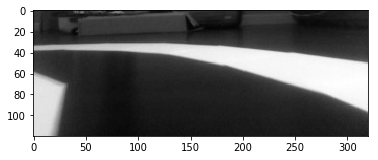

In [25]:
plt.imshow(X[1].reshape(120, 320), cmap='gray')
print(y[1])

In [24]:
# Forward right / right: 0100
# Forward left / left: 1000
# Forward: 0010

k = np.zeros((4, 4), 'float')
for i in range(4):
    k[i, i] = 1
print(k)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [26]:
# create a neural network
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 4])
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [27]:
# training
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

True

In [29]:
# evaluate on training data
ret, resp = model.predict(X)
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)

train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (y)
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

50
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
Train accuracy:  40.00%
